# Google Analytics Customer Revenue Prediction

## Initial data: 

<b>Data Fields: </b>
<b>fullVisitorIdv</b> - A unique identifier for each user of the Google Merchandise Store. <br>
<b>channelGrouping</b> - The channel via which the user came to the Store.<br>
<b>date</b> - The date on which the user visited the Store.<br>
<b>device </b>- The specifications for the device used to access the Store.<br>
<b>geoNetwork</b> - This section contains information about the geography of the user.<br>
<b>sessionId</b> - A unique identifier for this visit to the store.<br>
<b>socialEngagementType</b> - Engagement type, either "Socially Engaged" or "Not Socially Engaged".<br>
<b>totals</b> - This section contains aggregate values across the session.<br>
<b>trafficSource</b> - This section contains information about the Traffic Source from which the session originated.<br>
<b>visitId</b> - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.<br>
<b>visitNumber</b> - The session number for this user. If this is the first session, then this is set to 1.<br>
<b>visitStartTime</b> - The timestamp (expressed as POSIX time).<br>

## Importing necessary librarys

In [1]:
# Necessary librarys
import os # it's a operational system library, to set some informations
import random # random is to generate random values

import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values

import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json file

# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

## Some columns are in Json format so it will be necessary to handle with this problem.



In [2]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource'] # Columns that have json format

dir_path = "C:\\Users\\dee Jay\\Downloads\\ga-customer-revenue-prediction\\"
 # you can change to your local 

# p is a fractional number to skiprows and read just a random sample of the our dataset. 
p = 0.05 # *** In this case we will use 5% of data set *** #

#Code to transform the json format columns in table
def json_read(df):
    #joining the [ path + df received]
    data_frame = dir_path + df
    
    #Importing the dataset
    df = pd.read_csv(data_frame, 
                     converters={column: json.loads for column in columns}, # loading the json columns properly
                     dtype={'fullVisitorId': 'str'}, # transforming this column to string
                     skiprows=lambda i: i>0 and random.random() > p)# Number of rows that will be imported randomly
    
    for column in columns: #loop to finally transform the columns in data frame
        #It will normalize and set the json to a table
        column_as_df = json_normalize(df[column]) 
        # here will be set the name using the category and subcategory of json columns
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns] 
        # after extracting the values, let drop the original columns
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
        
    # Printing the shape of dataframes that was imported     
    print(f"Loaded {os.path.basename(data_frame)}. Shape: {df.shape}")
    return df # returning the df after importing and transforming

# Importing the datasets

In [3]:
%%time 
# %%time is used to calculate the timing of code chunk execution #

# We will import the data using the name and extension that will be concatenated with dir_path
df_train = json_read("train_v2.csv") 
# The same to test dataset
#df_test = json_read("test.csv") 

Loaded train_v2.csv. Shape: (85466, 60)
Wall time: 2min 14s


In [4]:
# This command shows the first 5 rows of our dataset
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20171016,4451974801631421239,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",Not Socially Engaged,1508214856,1,1508214856,Firefox,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,3998960305302697679,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1508193590,1,1508193590,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,6933874459072117355,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508174142,1,1508174142,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,"[{'index': '4', 'value': 'North America'}]",20171016,2135909243596611457,"[{'hitNumber': '1', 'time': '0', 'hour': '18',...",Not Socially Engaged,1508204369,1,1508204369,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
4,Organic Search,"[{'index': '4', 'value': 'South America'}]",20171016,9325268255005246823,"[{'hitNumber': '1', 'time': '0', 'hour': '3', ...",Not Socially Engaged,1508151230,1,1508151230,Chrome,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


## Knowing the missing values

In [5]:

def missing_values(data):
    total = data.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (data.isnull().sum() / data.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    
    print("\n Total of Sales % of Total: ", round((df_train[df_train['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    
    return 

In [6]:
# calling the missing values function
missing_values(df_train) 

Total columns at least one Values: 
                                              Total    Percent
trafficSource.campaignCode                    85465  99.998830
totals.totalTransactionRevenue                84590  98.975031
totals.transactionRevenue                     84590  98.975031
totals.transactions                           84589  98.973861
trafficSource.adContent                       82163  96.135305
trafficSource.adwordsClickInfo.slot           81689  95.580699
trafficSource.adwordsClickInfo.page           81689  95.580699
trafficSource.adwordsClickInfo.isVideoAd      81689  95.580699
trafficSource.adwordsClickInfo.adNetworkType  81689  95.580699
trafficSource.adwordsClickInfo.gclId          81682  95.572508
trafficSource.isTrueDirect                    58821  68.823860
trafficSource.referralPath                    57107  66.818384
trafficSource.keyword                         52548  61.484099
totals.timeOnSite                             43900  51.365455
totals.bounces     

### Nice. We can see that we have: <br>
Our target have just 1.3% of non-null values  <br> 
9 columns with 95%+ of missing values  <br>
13 columns with 50%+ of missing values <br>
16 column with 22%+  <br>
1 column with 0.004% <br> 

We will explore to understand what it looks like
                                          

In [7]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85466 entries, 0 to 85465
Data columns (total 60 columns):
channelGrouping                                      85466 non-null object
customDimensions                                     85466 non-null object
date                                                 85466 non-null int64
fullVisitorId                                        85466 non-null object
hits                                                 85466 non-null object
socialEngagementType                                 85466 non-null object
visitId                                              85466 non-null int64
visitNumber                                          85466 non-null int64
visitStartTime                                       85466 non-null int64
device.browser                                       85466 non-null object
device.browserSize                                   85466 non-null object
device.browserVersion                                85466 non-null ob

## Creating the function to handle with date 

In [8]:
# library of datetime
from datetime import datetime

# This function is to extract date features
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df #returning the df after the transformations

In [9]:
### Calling the function 

In [10]:
df_train = date_process(df_train) #calling the function that we created above

df_train.head(n=2) #printing the first 2 rows of our dataset

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,_weekday,_day,_month,_year,_visitHour
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",2017-10-16,4451974801631421239,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",Not Socially Engaged,1508214856,1,1508214856,Firefox,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,0
1,Organic Search,"[{'index': '4', 'value': 'North America'}]",2017-10-16,3998960305302697679,"[{'hitNumber': '1', 'time': '0', 'hour': '15',...",Not Socially Engaged,1508193590,1,1508193590,Chrome,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,18


## Before look the unique values in each column, I will drop the constant values that is not useful and will make the df lighter
for it, I will need to give some attention to numerical values

In [11]:
def FillingNaValues(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True).astype(int) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True).astype(int) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True).astype(int)   #filling NA's with 0
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df_train['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [12]:
def NumericalColumns(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals.pageviews'] = df['totals.pageviews'].astype(int) # setting numerical column as integer
    df['totals.newVisits'] = df['totals.newVisits'].astype(int) # setting numerical column as integer
    df['totals.bounces'] = df['totals.bounces'].astype(int)  # setting numerical column as integer
    df["totals.hits"] = df["totals.hits"].astype(float) # setting numerical to float
    df['totals.visits'] = df['totals.visits'].astype(int) # seting as int

    return df #return the transformed dataframe

Normalize

In [13]:
from sklearn import preprocessing

def Normalizing(df):
    # Use MinMaxScaler to normalize the column
    df["totals.hits"] =  (df['totals.hits'] - min(df['totals.hits'])) / (max(df['totals.hits'])  - min(df['totals.hits']))
    # normalizing the transaction Revenue
    df['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    # return the modified df
    return df 

### Let's investigate some constant columns

In [14]:
# We will takeoff all columns where we have a unique value (constants)
# It is useful because this columns don't give us none information
discovering_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]

# printing the total of columns dropped and the name of columns 
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  24 columns
Name of constant columns: 
 ['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.bounces', 'totals.newVisits', 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.campaignCode', 'trafficSource.isTrueDirect']


In [15]:
#Here are all columns that the unique value is 'not available in demo dataset'

not_aval_cols = ['socialEngagementType','device.browserSize','device.browserVersion', 'device.flashVersion', 
                 'device.language' ,'device.mobileDeviceBranding', 'device.mobileDeviceInfo','device.mobileDeviceMarketingName',
                 'device.mobileDeviceModel', 'device.mobileInputSelector' , 'device.operatingSystemVersion','device.screenColors',
                 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude' ,'geoNetwork.longitude',
                 'geoNetwork.networkLocation','trafficSource.adwordsClickInfo.criteriaParameters']

## I will drop some of this features and fillna or missing in some of them

In [20]:
to_drop = ["socialEngagementType",'device.browserVersion', 'device.browserSize', 'device.flashVersion', 'device.language', 
           'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
           'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 
           'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude','geoNetwork.networkLocation', 
           'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.campaign',
           'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot',
           'trafficSource.adContent', 'trafficSource.keyword']




In [21]:
len(to_drop)

25

In [22]:
df_train.drop(to_drop, axis=1, inplace=True)

In [23]:
print("Total features dropped: ", len(to_drop))
print("Shape after dropping: ", df_train.shape)

Total features dropped:  25
Shape after dropping:  (85466, 40)


In [24]:
# call the function to transform the numerical columns
df_train = NumericalColumns(df_train)

# Call the function that will normalize some features
df_train = Normalizing(df_train)

# looking if we have any mistake on 

for c in dummy_feaures:
    if c in to_drop: print(c)

### Let's see the unique values in our dataset. <br>

- if you want see click in "output"

In [25]:
# We will takeoff all columns where we have a unique value
# It is useful because this columns don't give us none information
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]


# this function drop all constant columns, inplacing the data 
df_train.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1, inplace=True) 

# printing the total of columns dropped and the name of columns 
print("This useful action will drop: ", len(clean_consts), "columns")
print("All dropped columns: \n", clean_consts)

This useful action will drop:  2 columns
All dropped columns: 
 ['totals.visits', 'trafficSource.campaignCode']


The output show us totals.visits and trafficSource.adwordsClickInfo.adNetworkType, but totals,visits can be useful, so I will drop just trafficSource feature

Excellent. Now we don't have more constant values

### Based on this output I will select and set a variable with all features by category

In [26]:
'trafficSource.adwordsClickInfo.adNetworkType'

'trafficSource.adwordsClickInfo.adNetworkType'

In [27]:
dummy_feaures =['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 
                'geoNetwork.subContinent']


numericals = ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

# First, let see the distribuition of transactions Revenues

I will start exploring the quantile 

### Function that I created to find the map outlier values
- Click on "code" to see the function

In [28]:
def CalcOutliers(df_num): 
    '''
    
    Leonardo Ferreira 20/10/2018
    Set a numerical value and it will calculate the upper, lower and total number of outliers
    It will print a lot of statistics of the numerical feature that you set on input
    
    '''
    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return


In [29]:
CalcOutliers(df_train['totals.transactionRevenue']) # Call 

Identified lowest outliers: 0
Identified upper outliers: 876
Identified outliers: 876
Non-outlier observations: 84590
Total percentual of Outliers:  1.0356


In [30]:
CalcOutliers(df_train['totals.pageviews']) # Call 

Identified lowest outliers: 0
Identified upper outliers: 1637
Identified outliers: 1637
Non-outlier observations: 83829
Total percentual of Outliers:  1.9528


# Device Browsers

Percentual of Browser usage: 
Chrome               58869
Safari               15579
Firefox               3157
Internet Explorer     1751
Android Webview       1713
Edge                  1025
Samsung Internet       777
Name: device.browser, dtype: int64


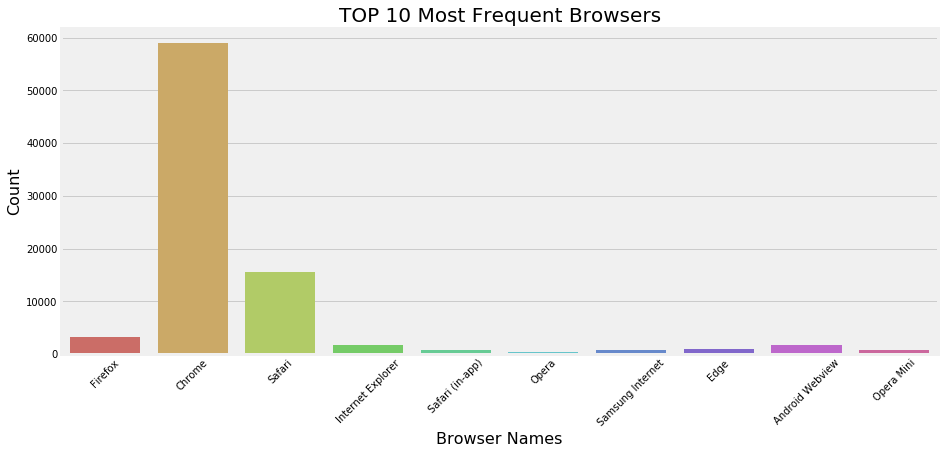

In [31]:
# the top 10 of browsers represent % of total
print("Percentual of Browser usage: ")
print(df_train['device.browser'].value_counts()[:7] ) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

In [32]:
flatui = ["#9b59b6","#3498db","#95a5a6","#e74c3c","#34495e","#2ecc71"]
sns.set_palette(flatui) 

## What if we cross the Revenue and Browser?


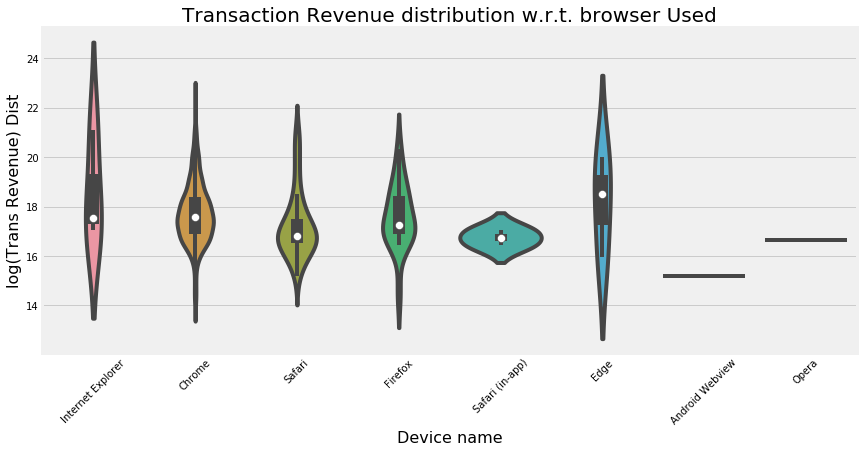

In [33]:
plt.figure(figsize=(13,6)) #figure size

#It's another way to plot our data. using a variable that contains the plot parameters
g1 = sns.violinplot(x='device.browser', y='totals.transactionRevenue', 
                   data=df_train[(df_train['device.browser'].isin((df_train['device.browser'].value_counts()[:10].index.values))) &
                                  df_train['totals.transactionRevenue'] > 0])
g1.set_title('Transaction Revenue distribution w.r.t. browser Used', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Device name', fontsize=16) # Xlabel
g1.set_ylabel('log(Trans Revenue) Dist', fontsize=16) #Ylabel

plt.show()

## Let's see the Channel Grouping
 - The channel via which the user came to the Store.

Percentual of Channel Grouping used: 
Organic Search    36981
Social            17810
Direct            13617
Referral          10550
Display            2618
Name: channelGrouping, dtype: int64


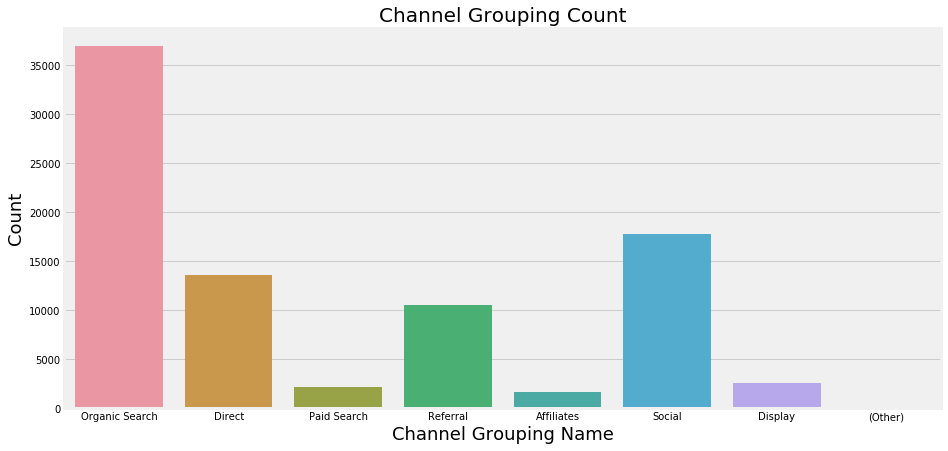

In [34]:
# the top 10 of browsers represent % of total
print("Percentual of Channel Grouping used: ")
print((df_train['channelGrouping'].value_counts()[:5])) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["channelGrouping"]) # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

## Crossing Channel Grouping x Browsers

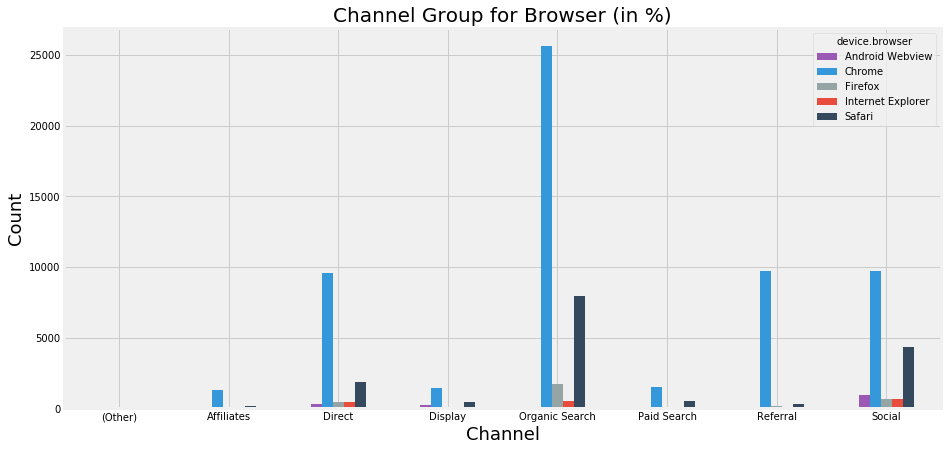

In [35]:
## I will use the crosstab to explore two categorical values

# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=df_train['channelGrouping'], normalize=False,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device.browser'].isin(df_train['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=False)   # code to unstack 
plt.title("Channel Group for Browser (in %)", fontsize=20) # seting the title size
plt.xlabel("Channel", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

# Operational System 

## Now let's investigate the most used brower by Operational System

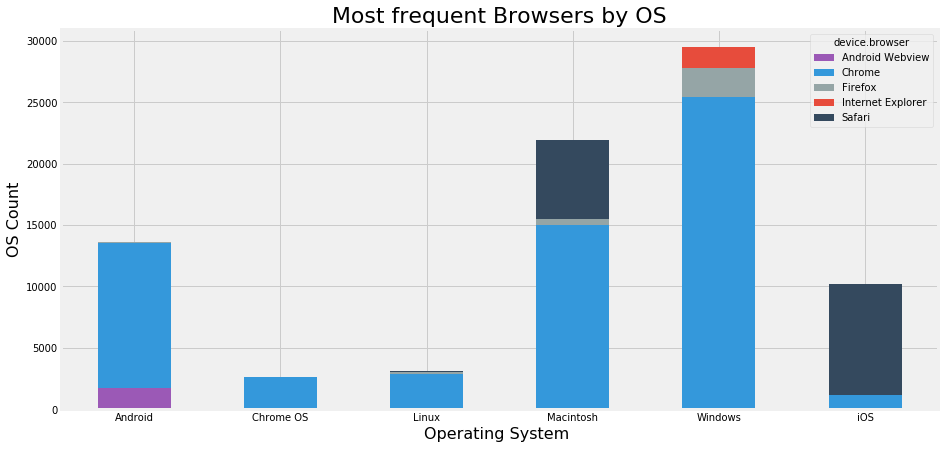

In [36]:

# At index I will use isin to substitute the loop and get just the values with more than 1%
crosstab_eda = pd.crosstab(index=df_train[df_train['device.operatingSystem']\
                                          .isin(df_train['device.operatingSystem']\
                                                .value_counts()[:6].index.values)]['device.operatingSystem'], 
                           
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=df_train[df_train['device.browser'].isin(df_train['device.browser']\
                                                                            .value_counts()[:5].index.values)]['device.browser'])
# Ploting the crosstab that we did above
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Most frequent Browsers by OS", fontsize=22) # adjusting title and fontsize
plt.xlabel("Operating System ", fontsize=16) # adjusting x label and fontsize
plt.ylabel("OS Count", fontsize=16) # adjusting y label and fontsize
plt.xticks(rotation=0) # Adjust the xticks, rotating the labels

plt.show() # rendering

## Let's investigate the Device Category

Percentual of Operational System: 
desktop    68.69
mobile     27.44
tablet      3.87
Name: device.deviceCategory, dtype: float64


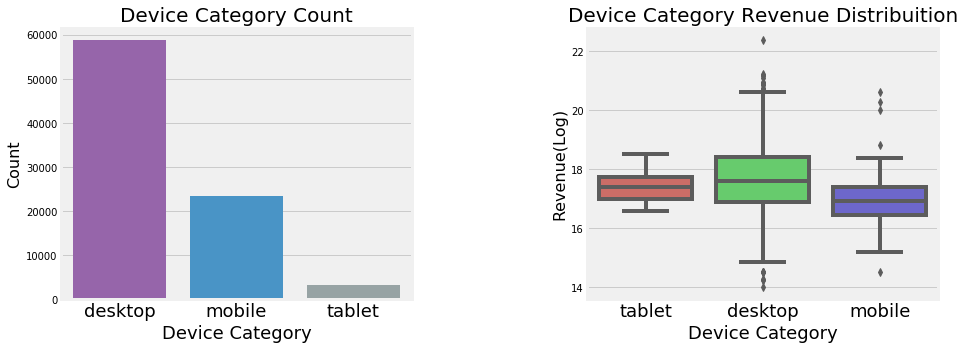

In [37]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(round(df_train['device.deviceCategory'].value_counts() / len(df_train['device.deviceCategory']) * 100, 2)) # printing the top 7 percentage of browsers
sns.set_palette(flatui) 
# seting the graph size
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
# let explore the browser used by users
sns.countplot(df_train["device.deviceCategory"]) # It's a module to count the category's
plt.title("Device Category Count", fontsize=20) # seting the title size
plt.xlabel("Device Category", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=16) # seting the y label size
plt.xticks(fontsize=18) # Adjust the xticks, rotating the labels

plt.subplot(1,2,2)
sns.boxplot(x="device.deviceCategory", y = 'totals.transactionRevenue', 
              data=df_train[df_train['totals.transactionRevenue'] > 0], palette="hls") # It's a module to count the category's
plt.title("Device Category Revenue Distribuition", fontsize=20) # seting the title size
plt.xlabel("Device Category", fontsize=18) # seting the x label size
plt.ylabel("Revenue(Log)", fontsize=16) # seting the y label size
plt.xticks(fontsize=18) # Adjust the xticks, rotating the labels

plt.subplots_adjust(hspace = 0.9, wspace = 0.5)

plt.show() #use plt.show to render the graph that we did above

In [38]:
df_train.to_csv("ProcessedData Google analytics.csv")

# SubContinent 

Description of SubContinent count: 
Northern America    38323
Southeast Asia       6128
Southern Asia        6011
Western Europe       5766
Northern Europe      5551
Eastern Asia         4542
South America        3839
Name: geoNetwork.subContinent, dtype: int64


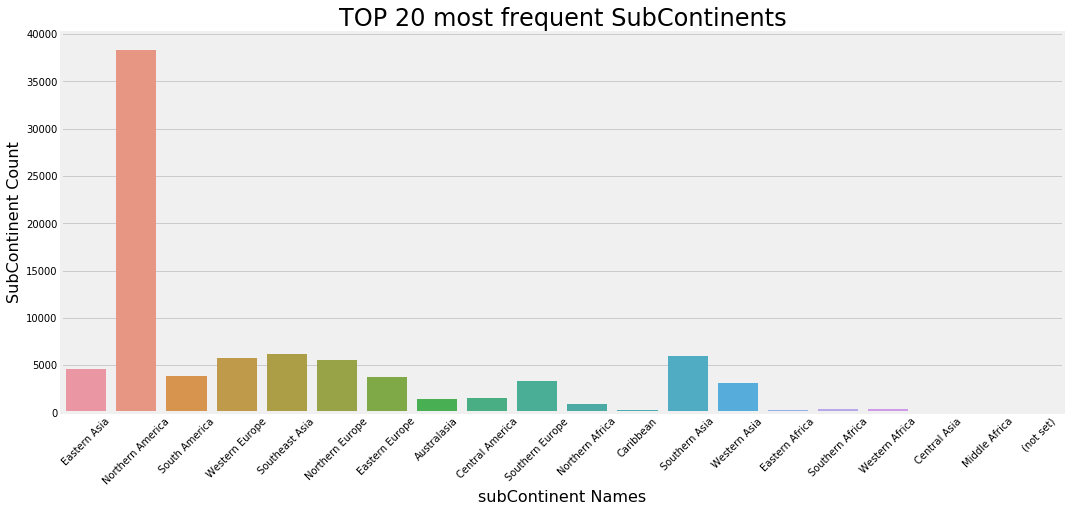

In [39]:
# the top 8 of browsers represent % of total
print("Description of SubContinent count: ")
print(df_train['geoNetwork.subContinent'].value_counts()[:7]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(16,7))

# let explore the browser used by users
sns.countplot(df_train[df_train['geoNetwork.subContinent']\
                       .isin(df_train['geoNetwork.subContinent']\
                             .value_counts()[:20].index.values)]['geoNetwork.subContinent']) # It's a module to count the category's
plt.title("TOP 20 most frequent SubContinents", fontsize=24) # seting the title size
plt.xlabel("subContinent Names", fontsize=16) # seting the x label size
plt.ylabel("SubContinent Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

WoW, We have a very high number of users from North America. 

TOP 5 regions are equivalent of almost 70% +-  of total 

TOP 1 => Northern America - 44.18% <br>
TOP 2 => Southeast Asia - 8.29% <br>
TOP 3 => Northern Europe - 6.73% <br>
TOP 4 => Southern Asia - 6.33% <br>
TOP 5 => Western Europe - 6.23% <br>

## Let's cross the SubContinent by Browser

Nice, this graph is very insightful.
The North America have a low ratio of Safari x Chrome... I thought that it was the contrary

Firefox have a relative high presence in North America too.

In [40]:
print('train date:', min(df_train['date']), 'to', max(df_train['date']))

train date: 2016-08-01 00:00:00 to 2018-04-30 00:00:00


In [41]:
year = df_train['_year'].value_counts()         # counting the Year with value counts
month = df_train['_month'].value_counts()      # coutning months
weeday = df_train['_weekday'].value_counts()    # Couting weekday
day = df_train['_day'].value_counts()              # counting Day
date = df_train['date'].value_counts()           # Counting date

## INTERACTIVE DATE FEATURES

## First I will explore revenue and number of visits by day

In [50]:
date_sales = [ '_weekday','_visitHour'] #seting the desired 

cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab( df_train[date_sales[1]],df_train[date_sales[0]], 
            values=df_train["totals.transactionRevenue"], aggfunc=[np.sum]).style.background_gradient(cmap = cm)

# tab.columns.levels[1] = ["Sun", "Mon", "Thu", "wed", "Thi","Fri","Sat"]

Very interesting, we can see that from 17  to 20 hour we have the highest numbers of 

In [43]:
number_of_colors = 15 # total number of different collors that we will use

# Here I will generate a bunch of hexadecimal colors 
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

## Exploring Countrys

Description most frequent countrys: 
United States     35739
India              5257
United Kingdom     3645
Canada             2582
Germany            1940
Brazil             1849
Japan              1790
Vietnam            1764
France             1606
Thailand           1515
Turkey             1417
Taiwan             1383
Mexico             1255
Spain              1194
Australia          1174
Name: geoNetwork.country, dtype: int64


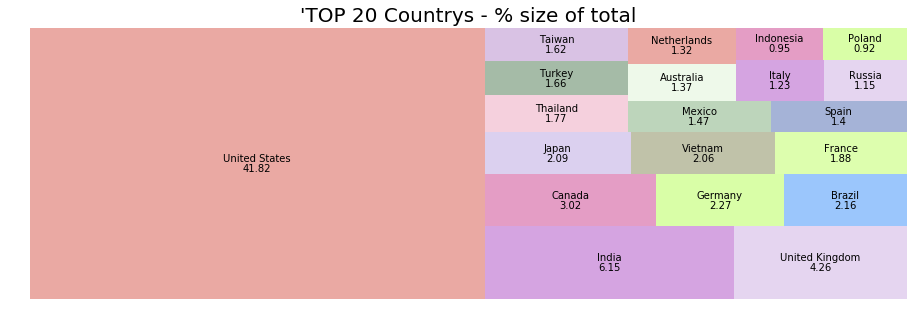

In [44]:
country_tree = df_train["geoNetwork.country"].value_counts() #counting the values of Country

print("Description most frequent countrys: ")
print(country_tree[:15]) #printing the 15 top most 

country_tree = round((df_train["geoNetwork.country"].value_counts()[:20] \
                       / len(df_train['geoNetwork.country']) * 100),2)

plt.figure(figsize=(14,5))
g = squarify.plot(sizes=country_tree.values, label=country_tree.index, 
                  value=country_tree.values,
                  alpha=.4, color=color)
g.set_title("'TOP 20 Countrys - % size of total",fontsize=20)
g.set_axis_off()
plt.show()

## Now, I will look on City feature and see the principal cities in the dataset

In [45]:
df_train.loc[df_train["geoNetwork.city"] == "not available in demo dataset", 'geoNetwork.city'] = np.nan

Description most frequent Citys: 
Mountain View       3703
(not set)           3350
New York            2422
San Francisco       1908
Sunnyvale           1399
London              1160
San Jose            1048
Los Angeles          846
Chicago              707
Bangkok              629
Bengaluru            558
Ho Chi Minh City     533
Toronto              511
Seattle              506
Istanbul             501
Name: geoNetwork.city, dtype: int64


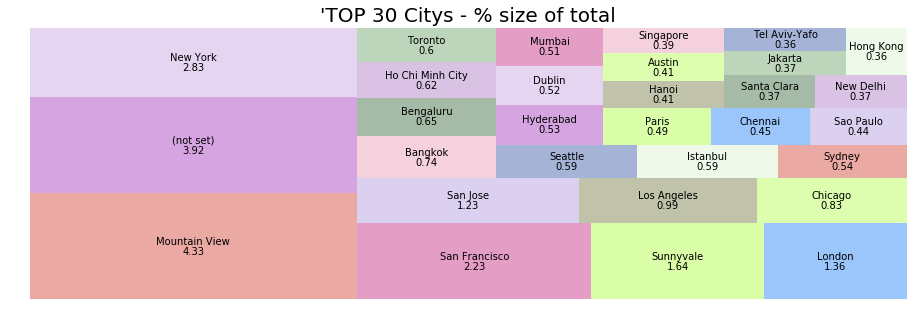

In [46]:
city_tree = df_train["geoNetwork.city"].value_counts() #counting 

print("Description most frequent Citys: " )
print(city_tree[:15])

city_tree = round((city_tree[:30] / len(df_train['geoNetwork.city']) * 100),2)

plt.figure(figsize=(14,5))
g = squarify.plot(sizes=city_tree.values, label=city_tree.index, 
                  value=city_tree.values,
                  alpha=.4, color=color)
g.set_title("'TOP 30 Citys - % size of total",fontsize=20)
g.set_axis_off()
plt.show()

### Creating a function with plotly to better investigate the dataset

- Click in "code" to see the commented code

In [47]:
def PieChart(df_colum, title, limit=15):
    """
    This function helps to investigate the proportion of visits and total of transction revenue 
    by each category
    """

    count_trace = df_train[df_colum].value_counts()[:limit].to_frame().reset_index()
    rev_trace = df_train.groupby(df_colum)["totals.transactionRevenue"].sum().nlargest(10).to_frame().reset_index()

    trace1 = go.Pie(labels=count_trace['index'], values=count_trace[df_colum], name= "% Acesses", hole= .2, 
                    hoverinfo="label+percent+name", showlegend=True,domain= {'x': [0, .48]}, 
                    marker=dict(colors=color))

    trace2 = go.Pie(labels=rev_trace[df_colum], 
                    values=rev_trace['totals.transactionRevenue'], name="% Revenue", hole= .2, 
                    hoverinfo="label+percent+name", showlegend=False, domain= {'x': [.52, 1]})

    layout = dict(title= title, height=450, font=dict(size=15),
                  annotations = [
                      dict(
                          x=.25, y=.5,
                          text='Visits', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Revenue', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)

## Device Category feature

In [48]:
sns.set_palette(flatui) 
PieChart("device.deviceCategory", "Device Category")

In [49]:
# call the function
PieChart("geoNetwork.city", "Top Cities by Accesses and Revenue", limit=12)

- New York is responsible by 14% of visits and 31% of revenues.
- Montain view have 19% in visists but just 16% of revenues
- Chicago have just 3.5% of visits but have a high significance in revenues

## Seeing again Channel Grouping more specified

In [159]:
PieChart("channelGrouping", "Channel Grouping Visits and Revenues")

It's interesting to note that Referral have a less number of Visits but is responsible for almost 40% of revenues****

### Months in pizza graph

## Let's see the NetWork Domain
- I will plot visits and revenues by each category, including the non-set and unknown accesses and revenues


In [160]:
PieChart('geoNetwork.networkDomain', "Network Domain")

Wow, another very cool information. 

- (not set) domain have almost 50% of total visits and 62% of Revenues.
- Unknown is responsible by 28% of visits but just 2.70% of Revenues
- comcast.net have 5.5% of visits and 7.4% Revenues.

Let's take a look on Mobile and Browser proportions

In [161]:
PieChart("device.deviceCategory", "Device Category")

The absolutelly high part of revenues are from Desktop Devices

## Trafic Source Medium

In [162]:
PieChart("trafficSource.medium", "Trafic Source - Medium")

In [164]:
df_train.corr()['totals.transactionRevenue']

visitId                                    -0.012057
visitNumber                                 0.014876
visitStartTime                             -0.012057
device.isMobile                            -0.050109
totals.bounces                             -0.104920
totals.hits                                 0.361060
totals.newVisits                           -0.094706
totals.pageviews                            0.378433
totals.transactionRevenue                   1.000000
totals.visits                                    NaN
trafficSource.adwordsClickInfo.isVideoAd    0.000927
trafficSource.isTrueDirect                  0.066823
_weekday                                   -0.010372
_day                                        0.001627
_month                                      0.001075
_year                                      -0.009754
_visitHour                                  0.036419
Name: totals.transactionRevenue, dtype: float64

Seeing the crosstab with heatmap

In [165]:
country_repayment = ['channelGrouping', '_weekday'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[country_repayment[0]], df_train[country_repayment[1]], 
            values=df_train["totals.transactionRevenue"], aggfunc=[np.sum]).style.background_gradient(cmap = cm)

# tab.columns.levels[1] = ["Sun", "Mon", "Thu", "wed", "Thi","Fri","Sat"]

C:\Users\dee Jay\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning:

invalid value encountered in reduce

C:\Users\dee Jay\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning:

invalid value encountered in reduce

C:\Users\dee Jay\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning:

invalid value encountered in less



##  Geolocation plot to visually understand the data

In [177]:
# Counting total visits by countrys
countMaps = pd.DataFrame(df_train['geoNetwork.country'].value_counts()).reset_index()
countMaps.columns=['country', 'counts'] #renaming columns
countMaps = countMaps.reset_index().drop('index', axis=1) #reseting index and droping the column

data = [ dict(
        type = 'choropleth',
        locations = countMaps['country'],
        locationmode = 'country names',
        z = countMaps['counts'],
        text = countMaps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(100,100,10)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Number of Visits'),
      ) ]

layout = dict(
    title = 'Couting Visits Per Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )
iplot(figure, validate=False, filename='map-countrys-count')

## Total Revenues by Country 

In [178]:
# I will crete a variable of Revenues by country sum
sumRevMaps = df_train[df_train['totals.transactionRevenue'] > 0].groupby("geoNetwork.country")["totals.transactionRevenue"].count().to_frame().reset_index()
sumRevMaps.columns = ["country", "count_sales"] # renaming columns
sumRevMaps = sumRevMaps.reset_index().drop('index', axis=1) #reseting index and drop index column

data = [ dict(
        type = 'choropleth',
        locations = sumRevMaps['country'],
        locationmode = 'country names',
        z = sumRevMaps['count_sales'],
        text = sumRevMaps['country'],
        autocolorscale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Count of Sales'),
      ) ]

layout = dict(
    title = 'Total Sales by Country',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

figure = dict( data=data, layout=layout )

iplot(figure, validate=False, filename='map-countrys-total')

### Some tests that I am doing to try find interesting feature engineering approaches

In [51]:
df_train['month_unique_user_count'] = df_train.groupby('_month')['fullVisitorId'].transform('nunique')
df_train['day_unique_user_count'] = df_train.groupby('_day')['fullVisitorId'].transform('nunique')
df_train['weekday_unique_user_count'] = df_train.groupby('_weekday')['fullVisitorId'].transform('nunique')


df_train['traf_sourc_browser_count'] = df_train.groupby(['trafficSource.medium', 'device.browser'])['totals.pageviews'].transform('nunique')
df_train['Id_browser_pageviews_sumprod'] = df_train.groupby(['fullVisitorId', 'device.browser'])['totals.pageviews'].transform('cumprod')
df_train['Id_browser_hits_sumprod'] = df_train.groupby(['fullVisitorId', 'device.browser'])['totals.hits'].transform('cumprod')
df_train['Id_browser_hits_sumprod'] = df_train.groupby(['fullVisitorId', 'device.browser'])['totals.hits'].transform('cumprod')
df_train['Id_browser_hits_sumprod_mob'] = df_train.groupby(['fullVisitorId', 'device.browser', 'device.isMobile'])['totals.hits'].transform('sum')

df_train['Id_networkDomain_hits'] = df_train.groupby(['fullVisitorId', 'geoNetwork.networkDomain'])['totals.hits'].transform('var')
df_train['Id_networkDomain_country_hits'] = df_train.groupby(['fullVisitorId', 'geoNetwork.networkDomain', 'geoNetwork.country'])['totals.hits'].transform('unique')



In [52]:
df_train[["totals.transactionRevenue", 'Id_browser_hits_sumprod', 'Id_networkDomain_hits','Id_networkDomain_country_hits', 'Id_browser_hits_sumprod_mob']].corr()

,totals.transactionRevenue,Id_browser_hits_sumprod,Id_networkDomain_hits,Id_browser_hits_sumprod_mob
totals.transactionRevenue,1.000000,0.341129,0.100031,0.307171
Id_browser_hits_sumprod,0.341129,1.000000,0.385547,0.778807
Id_networkDomain_hits,0.100031,0.385547,1.000000,0.540176
Id_browser_hits_sumprod_mob,0.307171,0.778807,0.540176,1.000000


## Preprocessing the fulldataset and creating new features

In [53]:
aggs = {
    'date': ['min', 'max'],
    'totals.hits': ['sum', 'min', 'max', 'mean', 'median'],
    'totals.pageviews': ['sum', 'min', 'max', 'mean', 'median'],
    'totals.bounces': ['sum', 'mean', 'median'],
    'totals.newVisits': ['sum', 'mean', 'median']
}

# Previous applications categorical features
cat_aggregations = {}

for cat in dummy_feaures:
    cat_aggregations[cat] = ['min', 'max', 'mean']

prev_agg = df_train.groupby('fullVisitorId').agg({**aggs})

prev_agg.columns = pd.Index(['Agg_' + e[0] + "_" + e[1].upper() for e in prev_agg.columns.tolist()])

In [54]:
prev_agg

,Agg_date_MIN,Agg_date_MAX,Agg_totals.hits_SUM,Agg_totals.hits_MIN,Agg_totals.hits_MAX,Agg_totals.hits_MEAN,Agg_totals.hits_MEDIAN,Agg_totals.pageviews_SUM,Agg_totals.pageviews_MIN,Agg_totals.pageviews_MAX,Agg_totals.pageviews_MEAN,Agg_totals.pageviews_MEDIAN,Agg_totals.bounces_SUM,Agg_totals.bounces_MEAN,Agg_totals.bounces_MEDIAN,Agg_totals.newVisits_SUM,Agg_totals.newVisits_MEAN,Agg_totals.newVisits_MEDIAN
fullVisitorId,,,,,,,,,,,,,,,,,,
0000085840370633780,2017-09-08,2017-09-08,0.002506,0.002506,0.002506,0.002506,0.002506,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
0000091131414287111,2017-09-28,2017-09-28,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0000213131142648941,2017-04-28,2017-04-28,0.032581,0.032581,0.032581,0.032581,0.032581,13,13,13,13.0,13.0,0,0.0,0.0,1,1.0,1.0
0000245437374675368,2016-09-02,2016-09-02,0.002506,0.002506,0.002506,0.002506,0.002506,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
000026722803385797,2017-06-05,2017-06-05,0.005013,0.005013,0.005013,0.005013,0.005013,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
0000388388833742701,2016-11-27,2016-11-27,0.002506,0.002506,0.002506,0.002506,0.002506,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
0000414003317636552,2018-02-18,2018-02-18,0.015038,0.015038,0.015038,0.015038,0.015038,4,4,4,4.0,4.0,0,0.0,0.0,0,0.0,0.0
0000466288435490222,2017-12-11,2017-12-11,0.000000,0.000000,0.000000,0.000000,0.000000,2,1,1,1.0,1.0,2,1.0,1.0,1,0.5,0.5
0000639845445148063,2016-09-12,2016-09-12,0.017544,0.017544,0.017544,0.017544,0.017544,7,7,7,7.0,7.0,0,0.0,0.0,1,1.0,1.0


In [55]:
new_columns = [
        k + '_' + agg for k in aggs.keys() for agg in aggs[k]
    ]
new_columns

['date_min',
 'date_max',
 'totals.hits_sum',
 'totals.hits_min',
 'totals.hits_max',
 'totals.hits_mean',
 'totals.hits_median',
 'totals.pageviews_sum',
 'totals.pageviews_min',
 'totals.pageviews_max',
 'totals.pageviews_mean',
 'totals.pageviews_median',
 'totals.bounces_sum',
 'totals.bounces_mean',
 'totals.bounces_median',
 'totals.newVisits_sum',
 'totals.newVisits_mean',
 'totals.newVisits_median']

In [56]:
dummy_feaures

['channelGrouping',
 'device.browser',
 'device.deviceCategory',
 'geoNetwork.city',
 'device.operatingSystem',
 'trafficSource.medium',
 'trafficSource.source',
 'geoNetwork.continent',
 'geoNetwork.country',
 'geoNetwork.metro',
 'geoNetwork.networkDomain',
 'geoNetwork.region',
 'geoNetwork.subContinent']

In [57]:
### Testing some grouping approaches

In [58]:
df_train['cumcount'] = df_train.groupby('fullVisitorId').cumcount() + 1

Some tests to feature engineering

In [59]:
aggs = {
    'date': ['min', 'max'],
    'totals.transactionRevenue': ['sum', 'size'],
    'totals.hits': ['sum', 'min', 'max', 'count', 'median'],
    'totals.pageviews': ['sum', 'min', 'max', 'mean', 'median'],
    'totals.bounces': ['sum', 'mean', 'median'],
    'totals.newVisits': ['sum', 'mean', 'median']
}

# Previous applications categorical features
cat_aggregations = {}

for cat in dummy_feaures:
    cat_aggregations[cat] = ['min', 'max', 'mean']

prev_agg = df_train.groupby('fullVisitorId').agg({**aggs})

prev_agg.head()



date            totals.transactionRevenue       \
                           min        max                       sum size   
fullVisitorId                                                              
0000085840370633780 2017-09-08 2017-09-08                  0.000000    1   
0000091131414287111 2017-09-28 2017-09-28                  0.000000    1   
0000213131142648941 2017-04-28 2017-04-28                 17.329739    1   
0000245437374675368 2016-09-02 2016-09-02                  0.000000    1   
000026722803385797  2017-06-05 2017-06-05                  0.000000    1   

                    totals.hits                                      \
                            sum       min       max count    median   
fullVisitorId                                                         
0000085840370633780    0.002506  0.002506  0.002506     1  0.002506   
0000091131414287111    0.000000  0.000000  0.000000     1  0.000000   
0000213131142648941    0.032581  0.032581  0.032581     1  0.032581   
0000245437374675368    0.002506  0.002506  0.002506     1  0.002506   
000026722803385797     0.005013  0.005013  0.005013     1  0.005013   

                    totals.pageviews                      totals.bounces       \
                                 sum min max  mean median            sum mean   
fullVisitorId                                                                   
0000085840370633780                2   2   2   2.0    2.0              0  0.0   
0000091131414287111                1   1   1   1.0    1.0              1  1.0   
0000213131142648941               13  13  13  13.0   13.0              0  0.0   
0000245437374675368                2   2   2   2.0    2.0              0  0.0   
000026722803385797                 2   2   2   2.0    2.0              0  0.0   

                           totals.newVisits              
                    median              sum mean median  
fullVisitorId                                            
0000085840370633780    0.0                1  1.0    1.0  
0000091131414287111    1.0                1  1.0    1.0  
0000213131142648941    0.0                1  1.0    1.0  
0000245437374675368    0.0                1  1.0    1.0  
000026722803385797     0.0                1  1.0    1.0

In [60]:
prev_agg.columns = ["_".join(x) for x in prev_agg.columns.ravel()]

In [61]:
prev_agg.head()

,date_min,date_max,totals.transactionRevenue_sum,totals.transactionRevenue_size,totals.hits_sum,totals.hits_min,totals.hits_max,totals.hits_count,totals.hits_median,totals.pageviews_sum,totals.pageviews_min,totals.pageviews_max,totals.pageviews_mean,totals.pageviews_median,totals.bounces_sum,totals.bounces_mean,totals.bounces_median,totals.newVisits_sum,totals.newVisits_mean,totals.newVisits_median
fullVisitorId,,,,,,,,,,,,,,,,,,,,
0000085840370633780,2017-09-08,2017-09-08,0.000000,1,0.002506,0.002506,0.002506,1,0.002506,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
0000091131414287111,2017-09-28,2017-09-28,0.000000,1,0.000000,0.000000,0.000000,1,0.000000,1,1,1,1.0,1.0,1,1.0,1.0,1,1.0,1.0
0000213131142648941,2017-04-28,2017-04-28,17.329739,1,0.032581,0.032581,0.032581,1,0.032581,13,13,13,13.0,13.0,0,0.0,0.0,1,1.0,1.0
0000245437374675368,2016-09-02,2016-09-02,0.000000,1,0.002506,0.002506,0.002506,1,0.002506,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
000026722803385797,2017-06-05,2017-06-05,0.000000,1,0.005013,0.005013,0.005013,1,0.005013,2,2,2,2.0,2.0,0,0.0,0.0,1,1.0,1.0
